In [40]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing  import LabelEncoder
import pickle
import seaborn as sns

In [68]:
car=pd.read_csv(r"C:\Users\narma\OneDrive\Desktop\Project\autos.csv",header=0,sep=',',encoding='Latin1',)


In [70]:
car.sample()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
7891,10115,Renault KWID,Renault,KWID,357000.0,606000.0,5,15000,Individual,Petrol,Manual,23.01,999,67.0,5,1,300000


In [71]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   min_cost_price     15411 non-null  float64
 5   max_cost_price     15411 non-null  float64
 6   vehicle_age        15411 non-null  int64  
 7   km_driven          15411 non-null  int64  
 8   seller_type        15411 non-null  object 
 9   fuel_type          15411 non-null  object 
 10  transmission_type  15411 non-null  object 
 11  mileage            15411 non-null  float64
 12  engine             15411 non-null  int64  
 13  max_power          15411 non-null  float64
 14  seats              15411 non-null  int64  
 15  Owner_type         15411 non-null  int64  
 16  selling_price      154

In [72]:
##remove unwanted columns
car.drop(['Unnamed: 0','car_name','min_cost_price','max_cost_price','seller_type'],axis='columns',inplace=True)
car.sample()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
2865,Maruti,Ertiga,5,72000,Diesel,Manual,24.52,1248,88.5,7,2,840000


In [73]:
car1=car.copy()
car1=car1.drop_duplicates(['brand','model','vehicle_age','km_driven','fuel_type','transmission_type','mileage','engine','max_power','seats','Owner_type','selling_price'])

In [74]:
car1.shape

(15331, 12)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

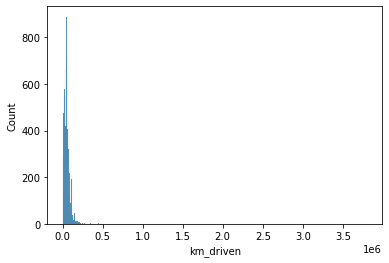

In [75]:
sns.histplot(data=car1,x='km_driven')

In [76]:
#remove outliears
cols= ['km_driven' , 'mileage' , 'engine' , 'max_power','selling_price']

In [77]:
car2 = car1.copy()
from datasist.structdata import detect_outliers 

outliears = detect_outliers(car2[cols],0,car2[cols].columns)
car2.drop(outliears,inplace=True)


In [78]:
car2.shape
car2.sample()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
6696,Skoda,Octavia,14,110000,Diesel,Manual,18.7,1896,66.0,5,1,295000


In [79]:
##saving cleaned datadet
car2.to_csv("autos_preprocessed.csv")

In [80]:
car2['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [81]:
##convert categorical columns into label encoding
labels=['brand','model','fuel_type','transmission_type']
mapper={}
for i in labels:
    mapper[i]=LabelEncoder()
    mapper[i].fit(car2[i])
    tr=mapper[i].transform(car2[i])
    np.save(str('classes'+i+'.npy'),mapper[i].classes_)
    print(i,":",mapper[i])
    car2.loc[:,i + '_labels']=pd.Series(tr,index=car2.index)
labeled=car2[['selling_price','vehicle_age','km_driven','mileage','engine','max_power','seats','Owner_type']+[x+"_labels" for x in labels]]
print(labeled.columns)
    


brand : LabelEncoder()
model : LabelEncoder()
fuel_type : LabelEncoder()
transmission_type : LabelEncoder()
Index(['selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'Owner_type', 'brand_labels', 'model_labels',
       'fuel_type_labels', 'transmission_type_labels'],
      dtype='object')


In [82]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12186 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   selling_price             12186 non-null  int64  
 1   vehicle_age               12186 non-null  int64  
 2   km_driven                 12186 non-null  int64  
 3   mileage                   12186 non-null  float64
 4   engine                    12186 non-null  int64  
 5   max_power                 12186 non-null  float64
 6   seats                     12186 non-null  int64  
 7   Owner_type                12186 non-null  int64  
 8   brand_labels              12186 non-null  int32  
 9   model_labels              12186 non-null  int32  
 10  fuel_type_labels          12186 non-null  int32  
 11  transmission_type_labels  12186 non-null  int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 1.0 MB


In [83]:
labeled.sample()

,selling_price,vehicle_age,km_driven,mileage,engine,max_power,seats,Owner_type,brand_labels,model_labels,fuel_type_labels,transmission_type_labels
8074,500000,6,95945,15.63,1499,110.4,5,3,3,25,3,0


In [84]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12186 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   selling_price             12186 non-null  int64  
 1   vehicle_age               12186 non-null  int64  
 2   km_driven                 12186 non-null  int64  
 3   mileage                   12186 non-null  float64
 4   engine                    12186 non-null  int64  
 5   max_power                 12186 non-null  float64
 6   seats                     12186 non-null  int64  
 7   Owner_type                12186 non-null  int64  
 8   brand_labels              12186 non-null  int32  
 9   model_labels              12186 non-null  int32  
 10  fuel_type_labels          12186 non-null  int32  
 11  transmission_type_labels  12186 non-null  int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 1.0 MB


In [85]:
labeled.isnull().any()

selling_price               False
vehicle_age                 False
km_driven                   False
mileage                     False
engine                      False
max_power                   False
seats                       False
Owner_type                  False
brand_labels                False
model_labels                False
fuel_type_labels            False
transmission_type_labels    False
dtype: bool

In [104]:
labeled['model_labels'].unique()

array([ 4, 33, 73, 25, 64, 72, 60, 54, 61, 20, 14, 11,  9, 55, 59, 19, 15,
       40,  6, 50, 10, 39, 35, 47, 51, 42,  7, 29, 62, 56, 45, 52, 13, 31,
       12, 38, 37,  2, 57, 28, 26, 70, 46, 30, 53, 43, 69, 22, 63, 68, 58,
        0, 27, 71, 48, 21,  8, 49,  1, 16, 41, 24, 44, 17, 74,  3, 32, 23,
       36, 65, 34, 67, 66,  5, 18])

In [87]:
##split the data set
X=labeled.iloc[:,1:].values
Y=labeled.iloc[:,0].values
Y=Y.reshape(-1,1)

In [88]:
np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [89]:
##train the dataset
from sklearn.model_selection import cross_val_score,train_test_split


In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=111)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)



(9748, 11)
(2438, 11)
(9748, 1)
(2438, 1)


In [91]:
#import support vector machine
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, Y_train)
classifier.score(X_train,Y_train)

C:\Users\narma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.027595404185473942

In [92]:
classifier.score(X_test,Y_test)

0.019688269073010665

In [93]:
##model building
##random forest
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,np.ravel(Y_train,order='C'))


RandomForestRegressor()

In [94]:
regressor.score(X_train,Y_train)

0.9818098058217938

In [95]:
regressor.score(X_test,Y_test)

0.8835011582363256

In [27]:
#linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
lr.score(X_train,Y_train)

0.7406358772484445

In [29]:
lr.score(X_test,Y_test)

0.7486364420198988

In [96]:
pred_test=regressor.predict(X_test)
pred_test

array([222820.        , 465945.83333333, 524820.        , ...,
       695900.        , 211937.5       , 517500.        ])

In [97]:
Y_test

array([[280000],
       [330000],
       [591000],
       ...,
       [650000],
       [200000],
       [600000]], dtype=int64)

In [98]:
#evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score
RMSE=r2_score(pred_test,Y_test)
RMSE

0.8757021996196013

In [99]:
labeled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12186 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   selling_price             12186 non-null  int64  
 1   vehicle_age               12186 non-null  int64  
 2   km_driven                 12186 non-null  int64  
 3   mileage                   12186 non-null  float64
 4   engine                    12186 non-null  int64  
 5   max_power                 12186 non-null  float64
 6   seats                     12186 non-null  int64  
 7   Owner_type                12186 non-null  int64  
 8   brand_labels              12186 non-null  int32  
 9   model_labels              12186 non-null  int32  
 10  fuel_type_labels          12186 non-null  int32  
 11  transmission_type_labels  12186 non-null  int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 1.0 MB


In [102]:
#saving the model
import pickle
filename='resales.sav'
pickle.dump(regressor,open(filename,"wb"))